# Import data

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost as xgb

import nltk
from nltk.corpus import names

nltk.download('names')

import gender_guesser.detector as gender
import opendatasets as od

plt.rcParams['figure.figsize'] = (15, 7)

/Users/valtervar/opt/anaconda3/envs/python_study/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[nltk_data] Downloading package names to /Users/valtervar/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [2]:
od.download('https://www.kaggle.com/competitions/spaceship-titanic/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdulrashidmukuev
Your Kaggle Key: ········


100%|█████████████████████████████████████████| 299k/299k [00:01<00:00, 266kB/s]


Extracting archive ./spaceship-titanic/spaceship-titanic.zip to ./spaceship-titanic


In [2]:
raw_df = pd.read_csv('spaceship-titanic/train.csv')
raw_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
raw_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [50]:
raw_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Data Preprocessing

In [51]:
# Check the size of positive and negative samples
print('Positive samples:', len(raw_df[raw_df['Transported'] == True]))
print('Negative samples:', len(raw_df[raw_df['Transported'] == False]))

Positive samples: 4378
Negative samples: 4315


* That's good, we have a balanced dataset to work with. So, standard metrics like accuracy can be really useful during the analysis.

In [172]:
# One-Hot-Encode categorical columns
df = pd.get_dummies(raw_df, columns = ['HomePlanet', 'Destination'], drop_first = True)
df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,1
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,0,1
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,0,1
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,1


We have in average only 200 missing values for every column. But if we just drop all the missing values, we'll lose about 2500 observations that is 30% of data. That's why have to remove nans in more complex way to avoid losing so much data.

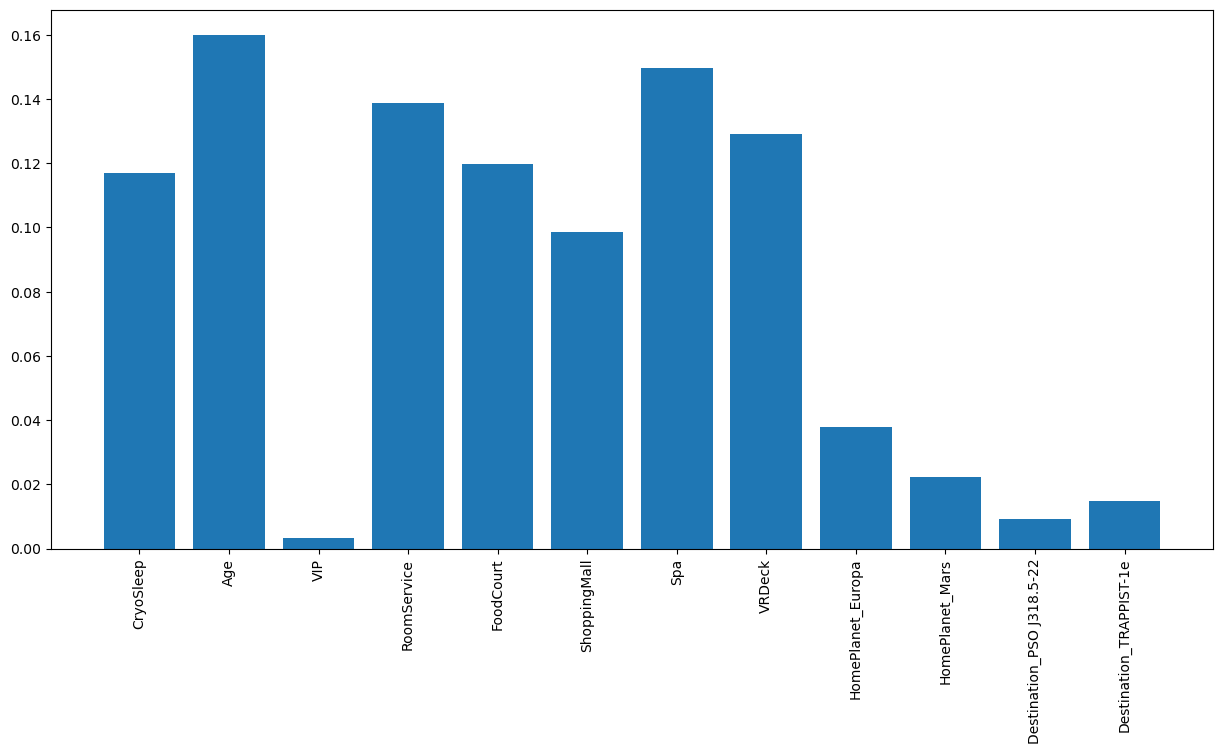

In [173]:
df_temp = df.dropna().drop(['PassengerId', 'Cabin', 'Name'], axis = 1)

X = df_temp.drop('Transported', axis = 1)
y = df_temp['Transported']

rf = RandomForestClassifier()
rf.fit(X, y)
plt.bar(height = rf.feature_importances_, x = X.columns)
plt.xticks(rotation = 90)
plt.show()

* As we can see, VIP, HomePlanet and Destination variables are not sighnificant for model. That's why we can just fill nans with some other value (these features are categorical, so we can fill them using the most popular class).

In [174]:
print('VIP:', sum(df_temp['VIP'] == True))
print('Non-VIP:', sum(df_temp['VIP'] == False))
print()
print('Europa:', sum(df_temp['HomePlanet_Europa'] == 1))
print('Earth:', sum((df_temp['HomePlanet_Europa'] == 0) & (df_temp['HomePlanet_Mars'] == 0)))
print('Mars:', sum(df_temp['HomePlanet_Mars'] == 1))
print()
print('J318.5-22:', sum(df_temp['Destination_PSO J318.5-22'] == 1))
print('55 Cancri e:', sum((df_temp['Destination_PSO J318.5-22'] == 0) & (df_temp['Destination_TRAPPIST-1e'] == 0)))
print('TRAPPIST-1e:', sum(df_temp['Destination_TRAPPIST-1e'] == 1))

VIP: 169
Non-VIP: 6749

Europa: 1703
Earth: 3815
Mars: 1400

J318.5-22: 637
55 Cancri e: 1579
TRAPPIST-1e: 4702


In [175]:
df['VIP'] = df['VIP'].fillna(0)
df['HomePlanet_Europa'] = df['HomePlanet_Europa'].fillna(0)
df['HomePlanet_Mars'] = df['HomePlanet_Mars'].fillna(0)
df['Destination_PSO J318.5-22'] = df['Destination_PSO J318.5-22'].fillna(0)
df['Destination_TRAPPIST-1e'] = df['Destination_TRAPPIST-1e'].fillna(1)

df.isna().sum()

PassengerId                    0
CryoSleep                    217
Cabin                        199
Age                          179
VIP                            0
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Name                         200
Transported                    0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
dtype: int64

In [176]:
df.dropna(inplace = True)
df.shape

(7089, 16)

* Looks better. We've deleted 1500 observations instead of 2500. 

# Baseline Solution

In [177]:
df_baseline = df.drop(['PassengerId', 'Cabin', 'Name'], axis = 1)

X = df_baseline.drop('Transported', axis = 1)
y = df_baseline['Transported']

rf = RandomForestClassifier()
cross_val_score(rf, X, y, scoring = 'accuracy', cv = 5).mean()

0.7874178447682931

* We've achieved 79% of accuracy using cross-validation. So, we need to overperform this baseline.

## Feature Engineering

Let's start with gender feature. We can extract it from "Name" column.

In [178]:
df[['FirstName', 'SecondName']] = df['Name'].str.split(pat=' ', n=2, expand=True)

# Function to extract the last letter
def gender_features(word):
    return {'last_letter':word[-1]}
  
# Preparing a list of examples and corresponding class labels
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
             [(name, 'female') for name in names.words('female.txt')])

# Shuffle names
random.shuffle(labeled_names)
  
# We use the feature extractor to process the names data
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
  
# The training set is used to train a new "naive Bayes" classifier
classifier = nltk.NaiveBayesClassifier.train(featuresets)
df['Sex'] = classifier.classify_many(df['FirstName'].apply(lambda x: gender_features(x)))

df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,FirstName,SecondName,Sex
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,1,Maham,Ofracculy,male
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,1,Juanna,Vines,female
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,0,1,Altark,Susent,male
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,0,1,Solam,Susent,male
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,1,Willy,Santantines,female


Also, we can extract some features from "Cabin" column.

In [179]:
df[['Cabin_Deck', 'Cabin_Number', 'Cabin_Side']] = df['Cabin'].str.split(pat='/', n=3, expand=True)
df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,FirstName,SecondName,Sex,Cabin_Deck,Cabin_Number,Cabin_Side
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,Maham,Ofracculy,male,B,0,P
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,0,0,1,Juanna,Vines,female,F,0,S
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,1,0,0,1,Altark,Susent,male,A,0,S
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,1,0,0,1,Solam,Susent,male,A,0,S
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,0,0,1,Willy,Santantines,female,F,1,S


In [180]:
print('Unique Cabin Deck:', df['Cabin_Deck'].unique())
print('Unique Cabin Number:', df['Cabin_Number'].unique())
print('Unique Cabin Side:', df['Cabin_Side'].unique())

Unique Cabin Deck: ['B' 'F' 'A' 'G' 'E' 'C' 'D' 'T']
Unique Cabin Number: ['0' '1' '2' ... '1892' '1894' '608']
Unique Cabin Side: ['P' 'S']


In [181]:
df = pd.get_dummies(df, columns = ['Cabin_Deck', 'Cabin_Side', 'Sex'], drop_first = True)
df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Number,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_S,Sex_male
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,0,0,0,0,1,0,0,1,0
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,0,0,0,0,0,0,0,1,1
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,0,0,0,0,0,1,1
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1,0,0,0,0,1,0,0,1,0


We also can make features from the passengerID column.

In [182]:
df[['Group', 'Place_In_Group']] = df['PassengerId'].str.split(pat='_', n=2, expand=True)
df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_S,Sex_male,Group,Place_In_Group
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0001,01
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,...,0,0,0,1,0,0,1,0,0002,01
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,0,0,0,0,0,0,1,1,0003,01
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,0,0,0,1,1,0003,02
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,...,0,0,0,1,0,0,1,0,0004,01


In [183]:
print('Unique Group Places:', df['Place_In_Group'].unique())

Unique Group Places: ['01' '02' '03' '04' '06' '05' '07' '08']


In [184]:
df = pd.get_dummies(df, columns = ['Place_In_Group'], drop_first = True)
df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Side_S,Sex_male,Group,Place_In_Group_02,Place_In_Group_03,Place_In_Group_04,Place_In_Group_05,Place_In_Group_06,Place_In_Group_07,Place_In_Group_08
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,...,0,1,0001,0,0,0,0,0,0,0
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,...,1,0,0002,0,0,0,0,0,0,0
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,1,1,0003,0,0,0,0,0,0,0
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,1,1,0003,1,0,0,0,0,0,0
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1,0,0004,0,0,0,0,0,0,0


# New Baseline Solution

Check the second baseline and feature importances.

In [185]:
df.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'FirstName', 'SecondName', 'Cabin_Number',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T', 'Cabin_Side_S',
       'Sex_male', 'Group', 'Place_In_Group_02', 'Place_In_Group_03',
       'Place_In_Group_04', 'Place_In_Group_05', 'Place_In_Group_06',
       'Place_In_Group_07', 'Place_In_Group_08'],
      dtype='object')

In [186]:
df_baseline_2 = df.drop(['PassengerId', 'Cabin', 'Name', 'FirstName', 'SecondName', 'Cabin_Number', 'Group'], axis = 1)

X = df_baseline_2.drop('Transported', axis = 1)
y = df_baseline_2['Transported']

rf = RandomForestClassifier()
cross_val_score(rf, X, y, scoring = 'accuracy', cv = 5).mean()

0.7889699229485205

* There is no uplift in accuracy at all. It's because we use too many feature, so let's exclude some of them.

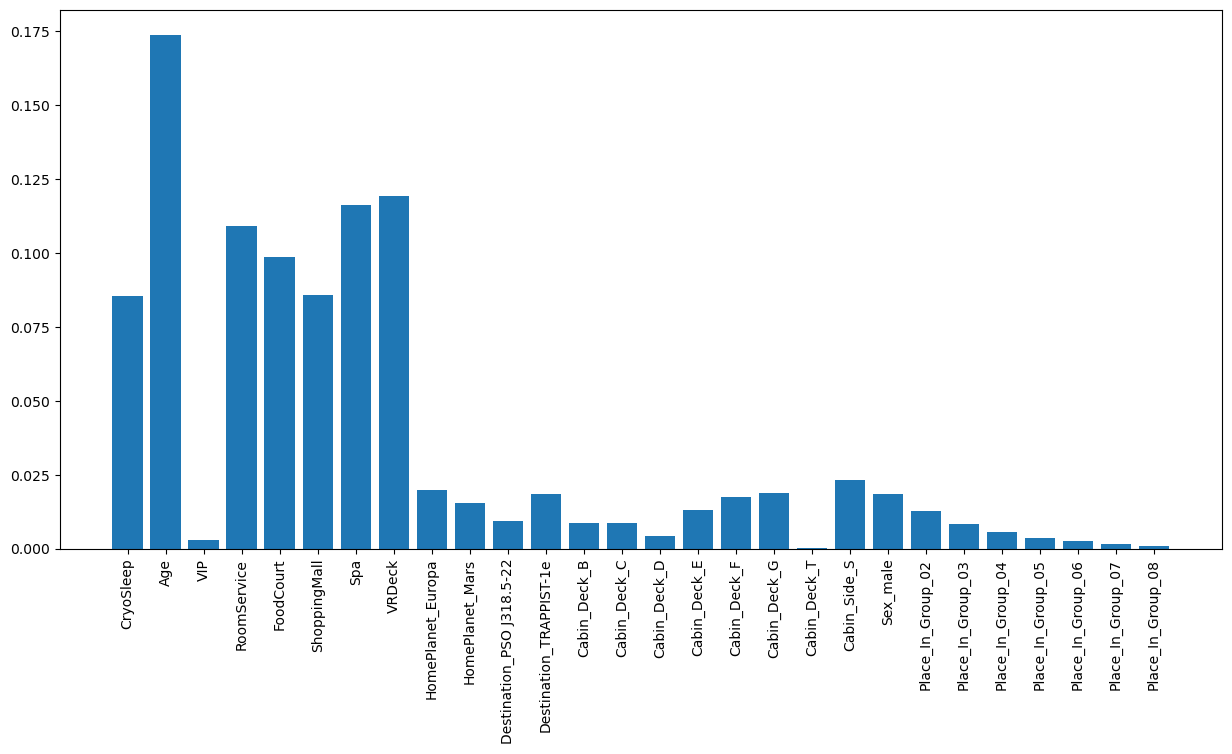

In [187]:
rf = RandomForestClassifier()
rf.fit(X, y)

plt.bar(height = rf.feature_importances_, x = X.columns)
plt.xticks(rotation = 90)
plt.show()

In [188]:
df = df[['Transported', 'CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
df['CryoSleep'] = np.where(df['CryoSleep'] == True, 1, 0)

X = df.drop('Transported', axis = 1)
y = df['Transported']

rf = RandomForestClassifier()
cross_val_score(rf, X, y, scoring = 'accuracy', cv = 5).mean()

0.7919320402168709

In [189]:
df_test = pd.read_csv('spaceship-titanic/test.csv')

In [190]:
X_test = df_test[['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [191]:
gb = xgb.XGBClassifier()
gb.fit(X, y)

result = gb.predict(X_test)

/Users/valtervar/opt/anaconda3/envs/python_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/valtervar/opt/anaconda3/envs/python_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:43:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [192]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [193]:
res = pd.DataFrame([df_test['PassengerId'], result]).T
res.columns = ['PassengerId', 'Transported']
res.index = res.PassengerId
res.drop('PassengerId', axis = 1, inplace = True)
res

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True
